In [12]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("msambare/fer2013")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/msambare/fer2013/versions/1


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix


In [14]:
# Define the paths to the dataset directories
train_dir = '/root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/train'
test_dir = '/root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/test'


In [15]:
# Initialize ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess the training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    batch_size=32,
    color_mode='grayscale',
    class_mode='categorical'
)

# Load and preprocess the testing data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    batch_size=32,
    color_mode='grayscale',
    class_mode='categorical'
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [16]:
# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Train the model
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=test_generator,
    callbacks=[early_stopping]
)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


898/898 ━━━━━━━━━━━━━━━━━━━━ 68s 74ms/step - accuracy: 0.2493 - loss: 1.8186 - val_accuracy: 0.3498 - val_loss: 1.6155
Epoch 2/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 66s 73ms/step - accuracy: 0.3522 - loss: 1.6456 - val_accuracy: 0.4466 - val_loss: 1.4540
Epoch 3/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 64s 71ms/step - accuracy: 0.4052 - loss: 1.5365 - val_accuracy: 0.4700 - val_loss: 1.3819
Epoch 4/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 65s 72ms/step - accuracy: 0.4378 - loss: 1.4593 - val_accuracy: 0.4805 - val_loss: 1.3451
Epoch 5/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 64s 71ms/step - accuracy: 0.4608 - loss: 1.4161 - val_accuracy: 0.5072 - val_loss: 1.3130
Epoch 6/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 65s 73ms/step - accuracy: 0.4731 - loss: 1.3789 - val_accuracy: 0.5156 - val_loss: 1.2601
Epoch 7/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 64s 72ms/step - accuracy: 0.4873 - loss: 1.3441 - val_accuracy: 0.5176 - val_loss: 1.2608
Epoch 8/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 64s 71ms/step - accuracy: 0.4938 - loss: 1.3259 - val_accurac

In [18]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy}')

# Generate predictions
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Generate confusion matrix and classification report
conf_matrix = confusion_matrix(y_true, y_pred_classes)
class_report = classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys())

print(conf_matrix)
print(class_report)


225/225 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.5894 - loss: 1.1125
Test Accuracy: 0.5833101272583008
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step
[[132   6  97 237 185 168 133]
 [ 18   1  12  25  25  19  11]
 [135   2  94 280 197 163 153]
 [234   7 194 480 318 296 245]
 [164   4 121 336 235 204 169]
 [158   5 124 339 242 202 177]
 [ 98   2  95 216 173 142 105]]
              precision    recall  f1-score   support

       angry       0.14      0.14      0.14       958
     disgust       0.04      0.01      0.01       111
        fear       0.13      0.09      0.11      1024
       happy       0.25      0.27      0.26      1774
     neutral       0.17      0.19      0.18      1233
         sad       0.17      0.16      0.17      1247
    surprise       0.11      0.13      0.12       831

    accuracy                           0.17      7178
   macro avg       0.14      0.14      0.14      7178
weighted avg       0.17      0.17      0.17      7178



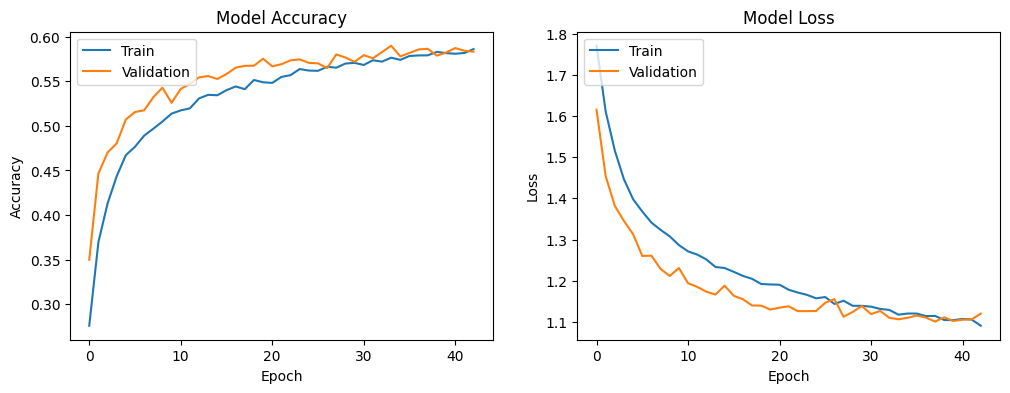

In [19]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()
